In [1]:
import os
import pandas
import librosa
import librosa.display
import glob 
import matplotlib.pyplot as plt
import numpy as np

from pydub import AudioSegment

import scipy as sp
from scipy.io.wavfile import read
from scipy.io.wavfile import write     # Imported libaries such as numpy, scipy(read, write), matplotlib.pyplot
from scipy import signal

/anaconda3/lib/python3.7/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [4]:
good, good_sr = librosa.load('good_device1_channel1_20181026084229.wav')
failure, failure_sr = librosa.load('failure_device1_channel1_20181025163850.wav')
stopped, stopped_sr = librosa.load('stopped_device1_channel1_20181025150420.wav')


In [9]:
good_shr = good[:15*10**6]
failure_shr = failure[:15*10**6]
stopped_shr = stopped[:15*10**6]


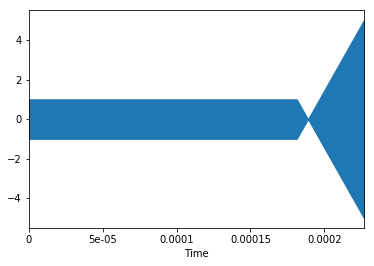

In [22]:
#librosa.display.waveplot(stopped_shr[:15*10**6] - good_shr[:15*10**6], good_sr)
librosa.display.waveplot(np.array([1., 2., 3., 4., 5., 0.]) - np.array([0., 1., 2., 3., 4., 5.]) , stopped_sr)

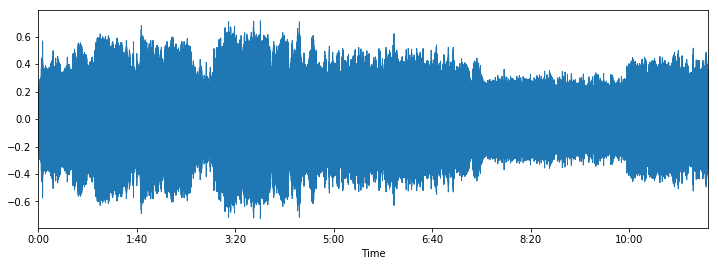

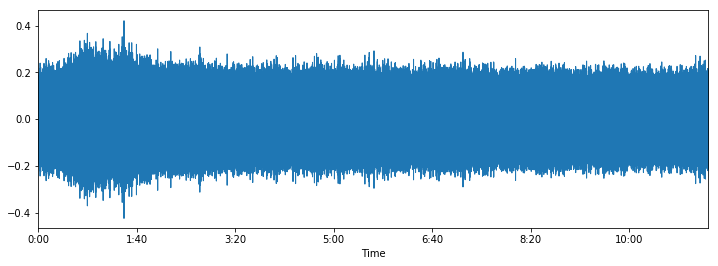

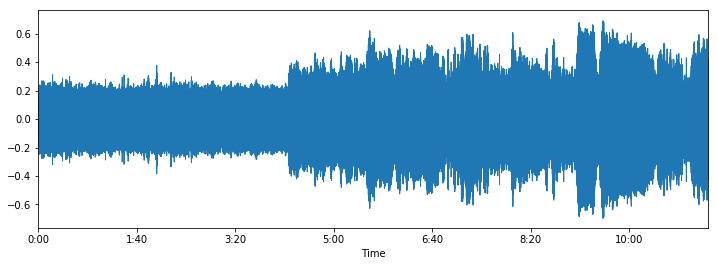

In [10]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(good_shr, good_sr)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(failure_shr, failure_sr)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(stopped_shr, stopped_sr)

In [41]:
good_mfccs = np.mean(librosa.feature.mfcc(y=good_shr, sr=good_sr, n_mfcc=40).T,axis=0) 
failure_mfccs = np.mean(librosa.feature.mfcc(y=failure_shr, sr=failure_sr, n_mfcc=40).T,axis=0) 
stopped_mfccs = np.mean(librosa.feature.mfcc(y=stopped_shr, sr=stopped_sr, n_mfcc=40).T,axis=0) 

In [93]:
for fld in os.listdir("./stop_good/"):
    print(fld)

st_gd_0, st_gd_sr_0 = librosa.load('./stop_good/device1_channel1_20181023044402.wav')
st_gd_1, st_gd_sr_1 = librosa.load('./stop_good/device1_channel1_20181020233049.wav')
st_gd_2, st_gd_sr_2 = librosa.load('./stop_good/device1_channel1_20181012155107.wav')

device1_channel1_20181023044402.wav
device1_channel1_20181014191109.wav
device1_channel1_20181012155107.wav
device1_channel1_20181020233049.wav
device1_channel1_20181013175924.wav
device1_channel1_20181014065409.wav
device1_channel1_20181020171255.wav
device1_channel1_20181024142547.wav
device1_channel1_20181015082457.wav


In [90]:
#st_gd_0_shr = st_gd_0[:15*10**6]
st_gd_1_shr = st_gd_1[8056721:10476821]
#st_gd_2_shr = st_gd_2[18533443:19533443]

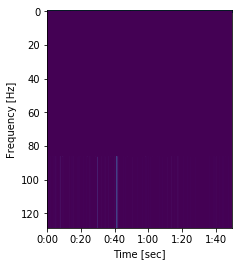

In [92]:
good, good_sr = librosa.load('good_device1_channel1_20181026084229.wav')
failure, failure_sr = librosa.load('failure_device1_channel1_20181025163850.wav')
stopped, stopped_sr = librosa.load('stopped_device1_channel1_20181025150420.wav')


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import math
import contextlib

fname = 'stopped_device1_channel1_20181025150420.wav'
outname = 'stop.wav'

cutOffFrequency = 100.0

# from http://stackoverflow.com/questions/13728392/moving-average-or-running-mean
def running_mean(x, windowSize):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[windowSize:] - cumsum[:-windowSize]) / windowSize

# from http://stackoverflow.com/questions/2226853/interpreting-wav-data/2227174#2227174
def interpret_wav(raw_bytes, n_frames, n_channels, sample_width, interleaved = True):

    if sample_width == 1:
        dtype = np.uint8 # unsigned char
    elif sample_width == 2:
        dtype = np.int16 # signed 2-byte short
    else:
        raise ValueError("Only supports 8 and 16 bit audio formats.")

    channels = np.fromstring(raw_bytes, dtype=dtype)

    if interleaved:
        # channels are interleaved, i.e. sample N of channel M follows sample N of channel M-1 in raw data
        channels.shape = (n_frames, n_channels)
        channels = channels.T
    else:
        # channels are not interleaved. All samples from channel M occur before all samples from channel M-1
        channels.shape = (n_channels, n_frames)

    return channels

with contextlib.closing(wave.open(fname,'rb')) as spf:
    sampleRate = spf.getframerate()
    ampWidth = spf.getsampwidth()
    nChannels = spf.getnchannels()
    nFrames = spf.getnframes()

    # Extract Raw Audio from multi-channel Wav File
    signal = spf.readframes(nFrames*nChannels)
    spf.close()
    channels = interpret_wav(signal, nFrames, nChannels, ampWidth, True)

    # get window size
    # from http://dsp.stackexchange.com/questions/9966/what-is-the-cut-off-frequency-of-a-moving-average-filter
    freqRatio = (cutOffFrequency/sampleRate)
    N = int(math.sqrt(0.196196 + freqRatio**2)/freqRatio)

    # Use moviung average (only on first channel)
    filtered = running_mean(channels[0], N).astype(channels.dtype)

    wav_file = wave.open(outname, "w")
    wav_file.setparams((1, ampWidth, sampleRate, nFrames, spf.getcomptype(), spf.getcompname()))
    wav_file.writeframes(filtered.tobytes('C'))
    wav_file.close()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.io import wavfile

samplerate, data = wavfile.read("./good_failure/device1_channel1_20181021180537.wav")
samples = data.shape[0]
from scipy.fftpack import fft,fftfreq

datafft = fft(data)
#Get the absolute value of real and complex component:
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
freqs = fftfreq(samples,1/samplerate)

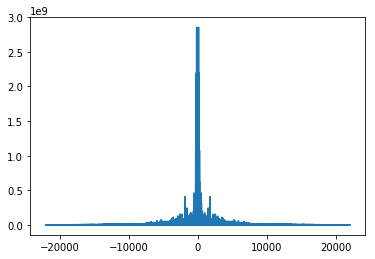

In [10]:
plt.plot(freqs,fftabs)

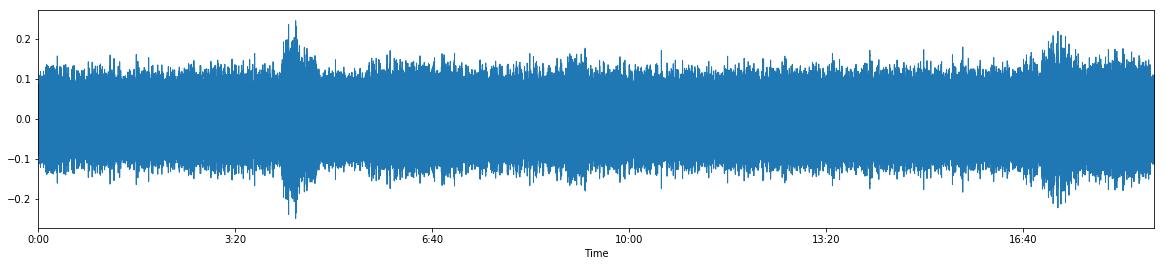

In [14]:
#x, xs = librosa.load('filtered.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, xs)

In [20]:
good, good_sr = librosa.load('good.wav')
failure, failure_sr = librosa.load('fail.wav')
stopped, stopped_sr = librosa.load('stop.wav')

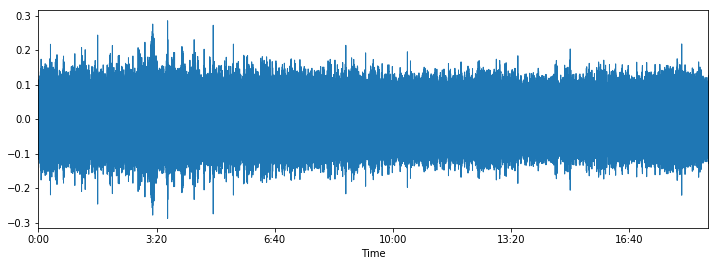

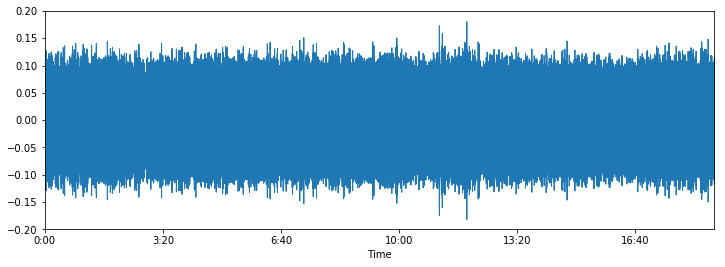

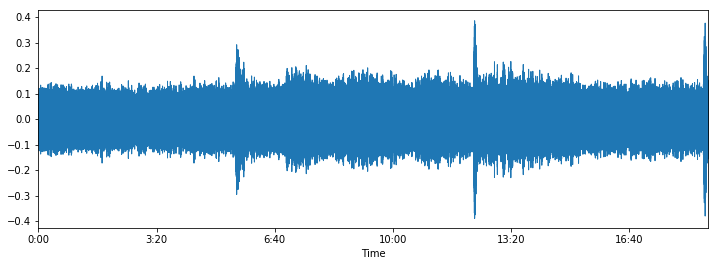

In [22]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(good, good_sr)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(failure, failure_sr)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(stopped, stopped_sr)